<font ><b><h1 style="font-size:3em; font-family:sans-serif"><center>Solving the Mean-Field Galactic Dynamo Equation along the z-axis</center></h1></b>

# PART 1

## Theory
### The Mean-Field Induction Equation
The mean field induction equation is given by:
     $$\frac{\partial \bar{B}}{\partial t}=\nabla \times (\bar{V}\times\bar{B}+\epsilon -\eta\nabla\times\bar{B})$$

Taking the first order smoothing approximation we can write $\epsilon=\alpha\bar{B}-\eta_t\nabla\times\bar{B}$
$$\frac{\partial \bar{B}}{\partial t}=\nabla \times (\bar{V}\times\bar{B}+\alpha\bar{B} -(\eta_t+\eta)\nabla\times\bar{B})$$
If we ignore the magnetic induction term and the alpha term diffusion equation can be writen as:
    $$\frac{\partial \bar{B}}{\partial t}=-\nabla \times \beta\nabla \times \bar{B}$$
where $\beta=\eta_t+\eta$.
If we assume beta to be independent of position we can write:
    $$\beta\nabla \times \nabla \times \bar{B}=\beta\left[\nabla(\nabla\cdot \bar{B})-\nabla^2 \bar{B}\right]$$
Using the solenoidality condition $\nabla\cdot B=0$ we get
 $$\frac{\partial \bar{B}}{\partial t}=\beta\nabla^2 \bar{B}$$
Writing the above equation componenet wise in cylindrical coordinates we get:
$$ \frac{\partial \bar{B}_r}{\partial t}=\beta\frac{1}{r^2}\frac{\partial}{\partial \phi ^2}\left(\bar{B}_r\right)-\frac{2}{r^2}\frac{\partial \bar{B}_\phi}{\partial \phi}+\beta \frac{\partial^2 \bar{B}_r}{\partial z^2}+\beta \frac{\partial}{\partial r}\left[\frac{1}{r} \frac{\partial}{\partial r}\left(r \bar{B}_r\right)\right],$$
$$ \frac{\partial \bar{B}_\phi}{\partial t}=\beta\frac{1}{r^2}\frac{\partial}{\partial \phi ^2}\left(\bar{B}_\phi\right)+\frac{2}{r^2}\frac{\partial \bar{B}_\phi}{\partial \phi}+\beta \frac{\partial^2 \bar{B}_\phi}{\partial z^2}+\beta \frac{\partial}{\partial r}\left[\frac{1}{r} \frac{\partial}{\partial r}\left(r \bar{B}_\phi\right)\right],$$
$$\frac{\partial \bar{B}_z}{\partial t}=\beta\frac{1}{r^2}\frac{\partial}{\partial \phi ^2}\left(\bar{B}_z\right)+\beta \frac{\partial^2 \bar{B}_z}{\partial z^2}+\beta \frac{\partial}{\partial r}\left[\frac{1}{r} \frac{\partial}{\partial r}\left(r \bar{B}_z\right)\right],$$
Assuming $\bar{B}$ to be axisymmetric all terms with $\frac{\partial}{\partial\phi}$ are zero<br>
Given my project was to solve for variation of B along z I will also be neglecting all $\frac{\partial}{\partial r}$ which gives us the following three equations
$$\frac{\partial \bar{B}_r}{\partial t}=\beta\frac{\partial^2 \bar{B}_r}{\partial z^2},\qquad \frac{\partial \bar{B}_\phi}{\partial t}=\beta\frac{\partial^2 \bar{B}_\phi}{\partial z^2},\qquad \frac{\partial \bar{B}_z}{\partial t}=\beta\frac{\partial^2 \bar{B}_z}{\partial z^2}$$
The magnetic diffusion coefficient $\beta$ is given by,
$$\beta\approx \frac{1}{3}\tau v_{rms}^2$$
where typical values of faraday time and velocity for a galaxy are $\tau\approx 10Myr$ $v_{rms}\approx 10km/s$ respectively which when substituted in the above equation gives a typical value for $\beta=34 pc^2/Myr$
### Total Magnetic field magnitude and pitch angle
Let's define $\bar{B}_{total}=\sqrt{\bar{B}_r^2+\bar{B}_\phi^2}$ we would be finding the variation of $\bar{B}_{total}$ with time
<br>We will also define pitch angle which is defined as $P_b=tan^{-1}\left(\frac{\bar{B}_r}{\bar{B}_\phi}\right)$
### Magnetic decay constant
The total magnetic field can be represented by the following equation
$$\bar{B}_{total}(z,t)=\bar{B}(z)exp(\gamma t)$$
where $\bar{B}(z)$ represents all the variation of magnetic field spatially and $\gamma$ represents the magnetic decay constant which we will be calculating
### Numerical integration
To numerically solve this equation I will be using the Crank Nickolson method which is a combination of explicit and implicit meathods with which has the advantage of being unconditionally stable with with an error of $\mathcal{O}(k^2)+\mathcal{O}(h^2)$ where k and h are the time step and spatial step size respectively.<br>
Crank–Nicolson Method uses the average of both previous and present time-step to numerically solve the problem. The discretized form of the equation is as follows.
$$ \frac{B^{j+1}_{i} - B^{j}_{i}}{dt} = \dfrac{\beta}{2} \: \left( \dfrac{B^{j+1}_{i+1} - 2B^{j+1}_{i} + B^{j+1}_{i-1}}{dz^2} \right) + \dfrac{\beta}{2} \: \left( \dfrac{B^{j}_{i+1} - 2B^{j}_{i} + B^{j}_{i-1}}{dz^2} \right) $$

where present time-step is represented by $(j+1)$ and the past time-step $(j)$ and $(i)$ denoted the spatial index of a particular grid point. Rearranging we get
$$ B^{j+1}_{i} - \dfrac{\beta \: dt}{2 \: dz^2} \: \left( B^{j+1}_{i+1} - 2B^{j+1}_{i} + B^{j+1}_{i-1} \right) = B^{j}_{i} + \dfrac{\beta \: dt}{2 \: dz^2} \: \left( B^{j}_{i+1} - 2B^{j}_{i} + B^{j}_{i-1} \right) $$
The above equation can be written in matrix form to be,
$$ PB^{j+1} = QB^{j} $$
where $P$ and $Q$ are matrices of the form,
$$ P=\left[\begin{array}{ccccc}1+2 \sigma & -\sigma & 0 & \cdots & 0 \\ -\sigma & 1+2 \sigma & -\sigma & \ddots & \vdots \\ 0 & -\sigma & 1+2 \sigma & \ddots & 0 \\ \vdots & \ddots & \ddots & \ddots & -\sigma \\ 0 & \cdots & 0 & -\sigma & 1+2 \sigma\end{array}\right]     \qquad \qquad      Q=\left[\begin{array}{ccccc}1-2 \sigma & \sigma & 0 & \cdots & 0 \\ \sigma & 1-2 \sigma & \sigma & \ddots & \vdots \\ 0 & \sigma & 1-2 \sigma & \ddots & 0 \\ \vdots & \ddots & \ddots & \ddots & \sigma \\ 0 & \cdots & 0 & \sigma & 1-2 \sigma\end{array}\right] $$ 
where $\sigma=\dfrac{\beta \: dt}{2 \: dz^2}$
<br><br>
$B^{j+1}$ can be obtained by multiplying the matrix equation throughout with $M^{-1}$ with resulting equation being
$$B^{j+1} = P^{-1}QB^{j} $$

The simulation grid is taken to be from -150 pc to 150 pc resembling the thickness of milky way galaxy disk which is around 1000 light years or 300pc with step size $dz=0.1$
<img src="https://thescientificodyssey.typepad.com/.a/6a01b8d0788cce970c01b8d29d8bf6970c-pi"><br>
Image source: [https://thescientificodyssey.typepad.com/my-blog/2017/08/episode-339-harlow-shapley-and-finding-our-place-in-the-galaxy.html]
The temporal grid range is taken according to the seed field magnitude such that there are 100 steps within the temporal range

## Code

Importing Packages

In [1]:
import numpy as np
import imageio
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import plotly.graph_objects as go
%matplotlib widget
from scipy.stats import linregress
import warnings
warnings.filterwarnings("ignore")
fig_s=800

### Defining Functions

Defining the Crank Nicolson Function

In [2]:
def crank_nicolson(u0, dx, dt, T,eta):
    """
    u0: initial condition, a function of x
    dx: space step size
    dt: time step size
    T: total time upto which integration is to be done
    """
    N = int(T/dt)
    J = len(u0)
    u = np.empty((N, J))
    u[0] = u0
    sigma = eta*dt / (dx**2)

    # Construct the tridiagonal matrices
    P=np.diag(2+2*sigma*np.ones(J))+np.diag(-sigma* np.ones(J-1), -1)+np.diag(-sigma* np.ones(J-1), 1)
    Q=np.diag(2-2*sigma*np.ones(J))+np.diag(sigma* np.ones(J-1), -1)+np.diag(sigma* np.ones(J-1), 1)
    # Iterating for each time step
    for n in range(N-1):
        b = u[n]
        # print(n)
        u[n+1] =  np.linalg.solve(P, np.dot(Q, b))
        u[n+1, 0] = u[n, 0]
        u[n+1, -1] = u[n, -1]
    return u

Calculating pitch angle

In [3]:
def b_total_pitch(B_r,B_phi):
    return np.sqrt(B_r**2+B_phi**2), np.where(B_phi!=0, np.arctan(B_r/B_phi)*180/np.pi, np.sign(B_r)*90)

Calculating decay factor gamma

In [4]:
def decay_factor(B_t,t,pl=0):
    log_B_t=np.log(B_t)
    # Plot log_B_t vs t


    # Fit a line to the last 100 data points
    
    slope, intercept, _, _, _ = linregress(t[-50:], log_B_t[-50:])
    fitted_line = slope * t[-50:] + intercept

    # Plot the fitted line
    if pl==0:
        fig1=plt.figure()
        plt.plot(t, log_B_t, label='log_B_t')
        plt.plot(t[-50:], fitted_line, label='Fitted Line')

        # Set labels and title
        plt.xlabel('t (Myr)')
        plt.ylabel(r'$log(B_{total} (G))$')
        plt.title(r'Plot of $log(B_{total})$ vs t')

        # Add legend
        plt.legend()

        # Show the plot
        plt.show()
    return slope

Creating animations

In [5]:
def create_ani(B,z_values,t_values,file_n,label):
    fig, ax = plt.subplots()
    def update(frame):
        ax.clear()
        ax.plot(z_values, B[frame, :])
        ax.set_title(f'Time={int(t_values[frame])}Myr')
        ax.set_xlabel(label[0])
        ax.set_ylabel(label[1])
        ax.set_xlim(z_values.min(), z_values.max())
        # ax.set_ylim().min(), B_array.max())

    ani = animation.FuncAnimation(fig, update, frames=len(t_values), interval=100)

    ani.save(file_n, writer='pillow')
    plt.close(fig)

### Applying specific Boundary Conditions

### 1) $B_{0r}=10^{-6}(\frac{3z}{z_{max}}+sin\left(\frac{3z}{z_{max}}\right)e^{-(\frac{3z}{z_{max}})^2})G$
### $\;\;\,$ $B_{0\phi}=10^{-6}sin\left(\frac{3\pi (z-z_{max})}{2z_{max}}\right)G$

Boundary conditions resolution and other parameters

In [6]:
#Spatial resolution and spatial domain
z_min = -150 #pc
z_max = 150 #pc
dz = 1 #pc
#Array of all spatial points
z_val = np.arange(z_min, z_max + dz, dz)
#Time resolution and time upto which integration is to be done
t_f=70 #Myr
dt=0.1 #Myr

t_val = np.arange(0, t_f, dt)
#Initial condition
B0_R=(1e-6)*((3*z_val/z_max) + np.sin(3*z_val/z_max)) * np.exp(-(3*z_val/z_max)**2.0)
B0_PHI=(1e-6)*np.sin(np.pi*(3*(z_val-z_max)/(2*z_max)))
#Diffusion parameter
eta=348

Plotting seed magnetic field

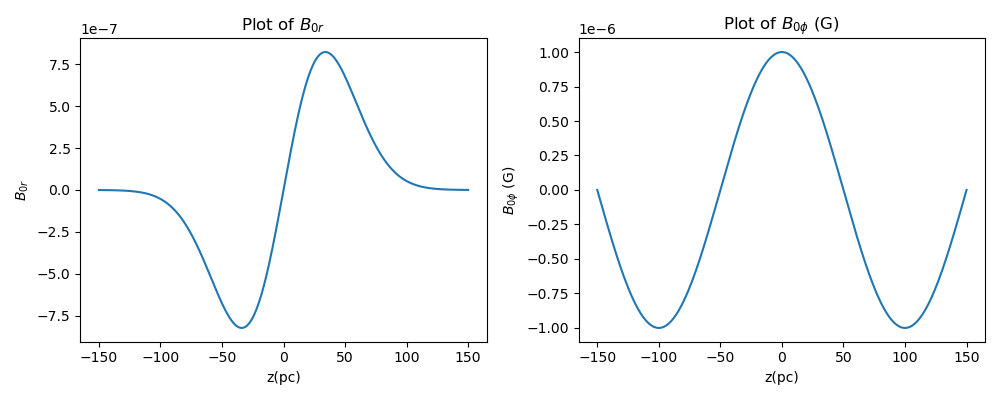

In [7]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=[10, 4])

# Plot of B0_R
axs[0].plot(z_val, B0_R)
axs[0].set_xlabel('z(pc)')
axs[0].set_ylabel(r'$B_{0r}$')
axs[0].set_title(r'Plot of $B_{0r}$')

# Plot of B0_PHI
axs[1].plot(z_val, B0_PHI)
axs[1].set_xlabel('z(pc)')
axs[1].set_ylabel(r'$B_{0\phi}$ (G)')
axs[1].set_title(r'Plot of $B_{0\phi}$ (G)')

plt.tight_layout()
plt.show()

Plotting B in 3d

Plotting variation of $B_{r}$ with time

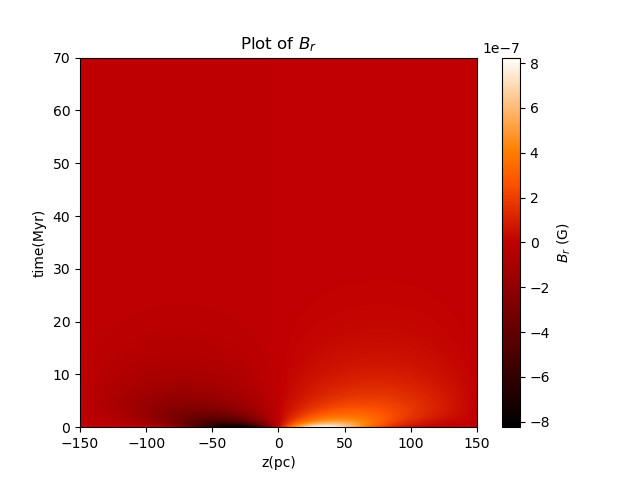

In [8]:
B_R = crank_nicolson(B0_R, dz, dt, t_f,eta)
fig1=plt.figure()
plt.imshow(B_R, cmap='gist_heat', origin='lower', aspect='auto',extent=[z_min, z_max, 0, t_f])
plt.colorbar(label=r'$B_{r}$ (G)')
plt.xlabel('z(pc)')
plt.ylabel('time(Myr)')
plt.title(r'Plot of $B_{r}$')
plt.show()

Plotting variation of $B_{\phi}$ with time

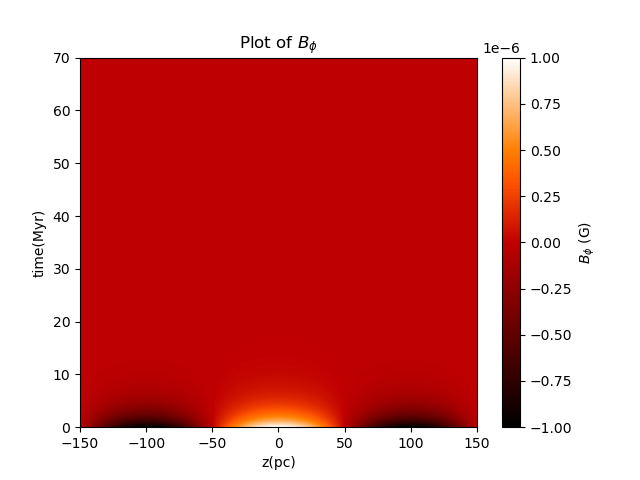

In [9]:
B_PHI = crank_nicolson(B0_PHI, dz, dt, t_f,eta)
fig1=plt.figure()
plt.imshow(B_PHI, cmap='gist_heat', origin='lower', aspect='auto',extent=[z_min, z_max, 0, t_f])
plt.colorbar(label=r'$B_{\phi}$ (G)')
plt.xlabel('z(pc)')
plt.ylabel('time(Myr)')
plt.title(r'Plot of $B_{\phi}$')
plt.show()

Calculating the decay rate $\gamma$ and $B_{total}$

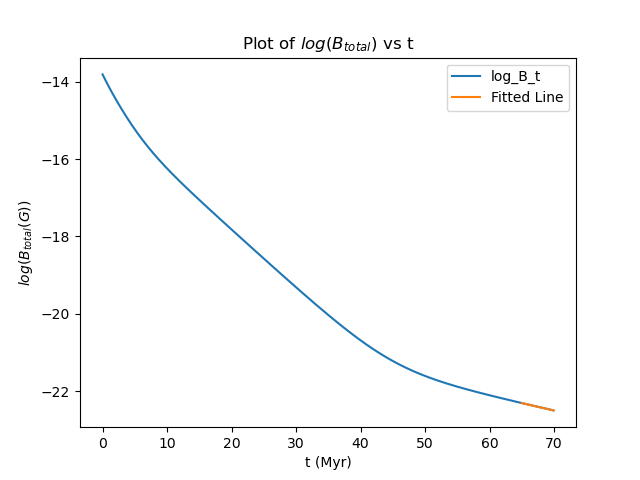

Decay factor gamma for B  0.0385655888410187


In [10]:
B_total,p_b=b_total_pitch(B_R,B_PHI)
gamma=decay_factor(B_total[:,50],t_val)
print("Decay factor gamma for B ",-gamma)

Ploting variation of $B_{total}$ with time

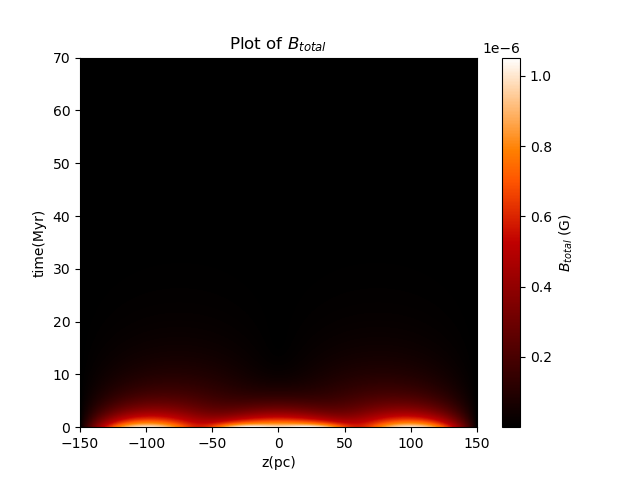

In [11]:
fig1=plt.figure()
plt.imshow(B_total, cmap='gist_heat', origin='lower', aspect='auto',extent=[z_min, z_max, 0, t_f])
plt.colorbar(label=r'$B_{total}$ (G)')
plt.xlabel('z(pc)')
plt.ylabel('time(Myr)')
plt.title(r'Plot of $B_{total}$')
plt.show()

In [12]:
# plt.close('all')
create_ani(B_total[::7],z_val,t_val[::7],'B_tot1.gif',['z (pc)',r'$B_{tot}$ (G)'])

![Variation of Total B with time](B_tot1.gif?dummy=156)

Plotting pitch angle $P_b$ versus time

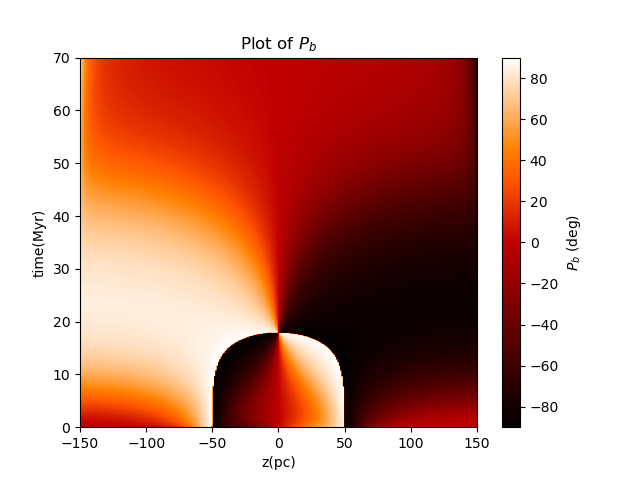

In [13]:
fig1=plt.figure()
plt.imshow(p_b[:][:,1:-1], cmap='gist_heat', origin='lower', aspect='auto',extent=[z_min, z_max, 0, t_f])
plt.colorbar(label=r'$P_b$ (deg)')
plt.xlabel('z(pc)')
plt.ylabel('time(Myr)')
plt.title(r'Plot of $P_b$')
plt.show()

In [14]:
create_ani(p_b[:][:,1:-1][::7],z_val[1:-1],t_val[::7],'P_b1.gif',['z (pc)',r'$P_b$ (deg)'])

![Pitch angle variation with time](P_b1.gif?dummy=41)

### 2) $B_{0r}=10^{-6}\left\{\frac{3z}{z_{max}}+1+sin\left(\frac{3z}{z_{max}}+1\right)e^{-(\frac{3z}{z_{max}}+1)^2}\right\} G$
### $\;\;\,$ $B_{0\phi}=10^{-6}sin\left(\frac{0.5\pi z}{z_{max}}\right) G$

Boundary conditions resolution and other parameters

In [57]:
#Spatial resolution and spatial domain
z_min = -150 #pc
z_max = 150 #pc
dz = 1 #pc
#Array of all spatial points
z_val = np.arange(z_min, z_max + dz, dz)
#Time resolution and time upto which integration is to be done
t_f=30 #Myr
dt=0.1 #Myr

t_val = np.arange(0, t_f, dt)
#Initial condition
B0_R=1e-6*((3*((z_val/z_max)+1)) + np.sin(3*((z_val/z_max)+1))) * np.exp(-(3*((z_val/z_max)+1))**2.0)
B0_PHI=1e-6*np.sin(np.pi*((0.5*(z_val+z_max)/(z_max))))
#Diffusion parameter
eta=348

Plotting seed magnetic field

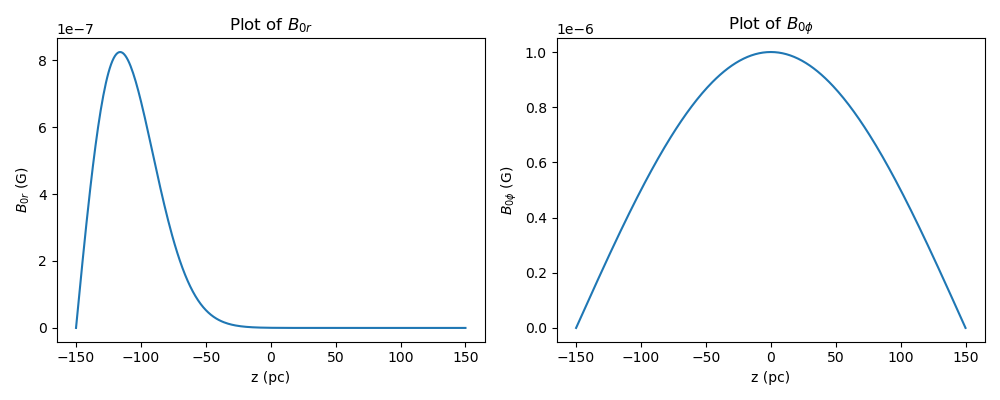

In [58]:
plt.close()
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

# Plot of B0_R
axs[0].plot(z_val, B0_R)
axs[0].set_xlabel('z (pc)')
axs[0].set_ylabel(r'$B_{0r}$ (G)')
axs[0].set_title(r'Plot of $B_{0r}$')

# Plot of B0_PHI
axs[1].plot(z_val, B0_PHI)
axs[1].set_xlabel('z (pc)')
axs[1].set_ylabel(r'$B_{0\phi}$ (G)')
axs[1].set_title(r'Plot of $B_{0\phi}$')

plt.tight_layout()
plt.show()


Plotting B in 3d

Plotting variation of $B_{r}$ with time

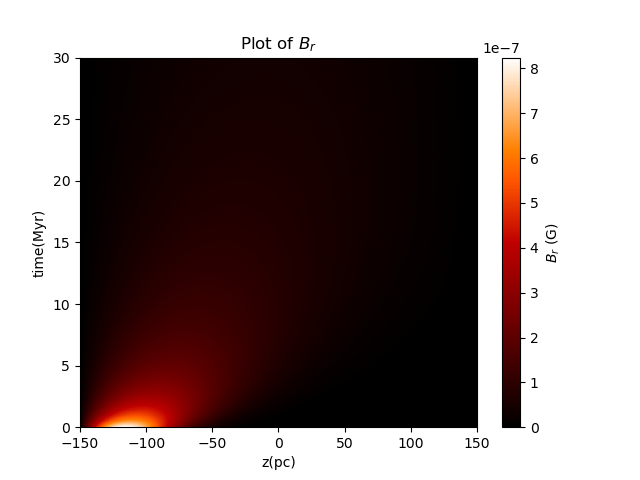

In [59]:
B_R = crank_nicolson(B0_R, dz, dt, t_f,eta)
fig1=plt.figure()
plt.imshow(B_R, cmap='gist_heat', origin='lower', aspect='auto',extent=[z_min, z_max, 0, t_f])
plt.colorbar(label=r'$B_{r}$ (G)')
plt.xlabel('z(pc)')
plt.ylabel('time(Myr)')
plt.title(r'Plot of $B_{r}$')
plt.show()

Plotting variation of $B_{\phi}$ with time

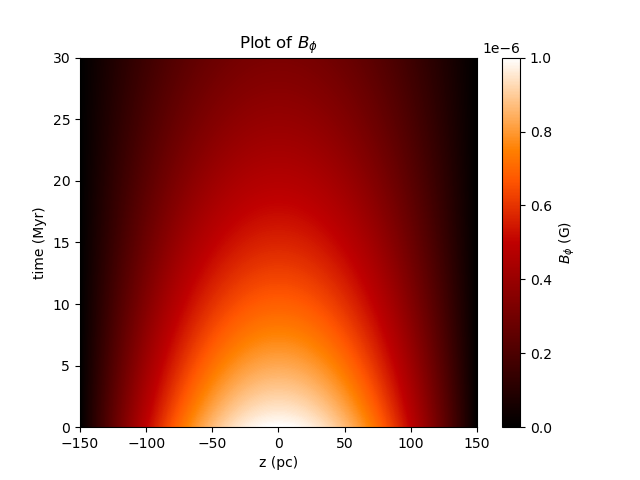

In [60]:
B_PHI = crank_nicolson(B0_PHI, dz, dt, t_f,eta)
fig1=plt.figure()
plt.imshow(B_PHI, cmap='gist_heat', origin='lower', aspect='auto',extent=[z_min, z_max, 0, t_f])
plt.colorbar(label=r'$B_{\phi}$ (G)')
plt.xlabel('z (pc)')
plt.ylabel('time (Myr)')
plt.title(r'Plot of $B_{\phi}$')
plt.show()

Calculating the decay rate $\gamma$ and $B_{total}$

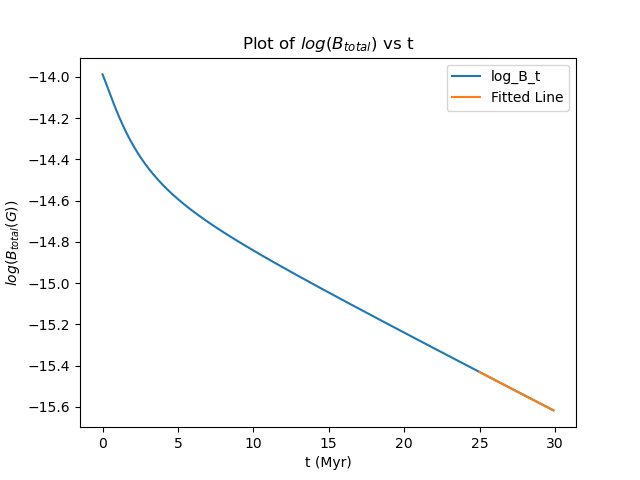

Decay factor gamma for B  0.037965598689969515


In [61]:
B_total,p_b=b_total_pitch(B_R,B_PHI)
gamma=decay_factor(B_total[:,50],t_val)
# Show the plot
# plt.show()
print("Decay factor gamma for B ",-gamma)

Ploting variation of $B_{total}$ with time

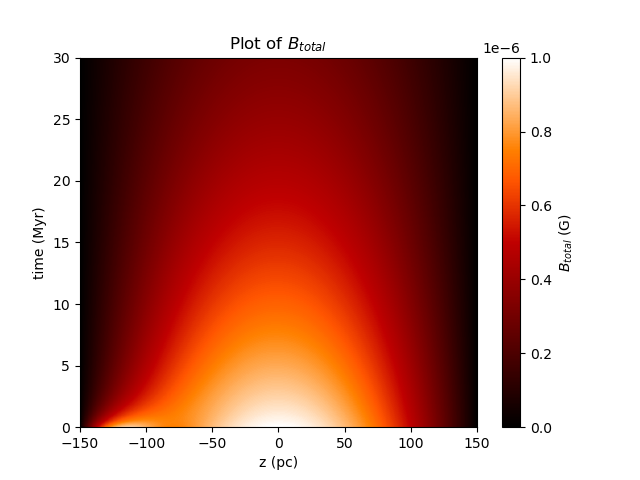

In [62]:
fig1=plt.figure()
plt.imshow(B_total, cmap='gist_heat', origin='lower', aspect='auto',extent=[z_min, z_max, 0, t_f])
plt.colorbar(label=r'$B_{total}$ (G)')
plt.xlabel('z (pc)')
plt.ylabel('time (Myr)')
plt.title(r'Plot of $B_{total}$')
plt.show()

In [22]:
create_ani(B_total[::5],z_val,t_val[::5],'B_tot2.gif',['z (pc)',r'$B_{tot}$ (G)'])

![Variation in Total B with time](B_tot2.gif)

Plotting pitch angle $P_b$ versus time

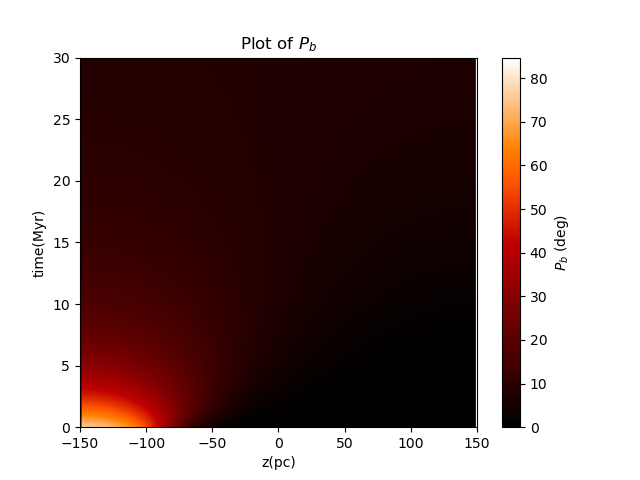

In [64]:
fig1=plt.figure()
plt.imshow(p_b, cmap='gist_heat', origin='lower', aspect='auto',extent=[z_min, z_max, 0, t_f])
plt.colorbar(label=r'$P_b$ (deg)')
plt.xlabel('z(pc)')
plt.ylabel('time(Myr)')
plt.title(r'Plot of $P_{b}$')
plt.show()

In [63]:
create_ani(p_b[:][:,1:-1][::7],z_val[1:-1],t_val[::7],'P_b2.gif',['z (pc)',r'$P_b$ (deg)'])

![Variation of Pitch angle with time](P_b2.gif?dummy=56313)

# PART 2

## Theory
### The Mean-Field Induction Equation
Like in the previous section we start with the mean-field equation
$$\frac{\partial \bar{B}}{\partial t}=\nabla \times (\bar{V}\times\bar{B}+\alpha\bar{B} -\beta\nabla\times\bar{B})$$

If we assume $\beta$ to be independent of position and using solenoidality condition $\nabla\cdot B=0$ as shown in part 1 we can simplify the equation to:
$$\dfrac{\partial \bar{B}}{\partial t} = \nabla \times \left( \bar{V} \times \bar{B} \right) + \nabla \times \left(\alpha \bar{B} \right) - \beta \left( \nabla \times \nabla \times \bar{B} \right) $$
$\bar{V}$ can be written in terms of its components in cylindrical coordinates as
$$\bar{V}=\bar{V}_r(r)\hat{r}+r\Omega(r)\hat{\phi}+\bar{V}_z(z)\hat{z}$$
Substituting for $\bar{V}$ in the mean-field equation and solving for each component in cylindrical coordinates taking azimuthal symmetry we get

$$ \frac{\partial \bar{B}_r}{\partial t} = V_r \frac{\partial \bar{B}_z}{\partial z} - \frac{\partial (V_z \bar{B}_r)}{\partial z} - \frac{\partial (\alpha \bar{B}_\phi)}{\partial z} + \beta \left[ \frac{\partial^2 \bar{B}_r}{\partial z^2} + \frac{\partial}{\partial r} \left( \frac{1}{r} \frac{\partial}{\partial r} \left( r \bar{B}_r \right) \right) \right] $$

$$ \frac{\partial \bar{B}_\phi}{\partial t} = r \Omega \frac{\partial \bar{B}_z}{\partial z} - \frac{\partial (V_z \bar{B}_\phi)}{\partial z} - \frac{\partial (V_r \bar{B}_\phi)}{\partial r} + \frac{\partial (r \Omega \bar{B}_r)}{\partial r} + \frac{\partial (\alpha \bar{B}_r)}{\partial z} - \frac{\partial (\alpha \bar{B}_z)}{\partial r} + \beta \left[ \frac{\partial^2 \bar{B}_\phi}{\partial z^2} + \frac{\partial}{\partial r} \left( \frac{1}{r} \frac{\partial}{\partial r} \left( r \bar{B}_\phi \right) \right) \right] $$
Using the $\alpha\Omega$ approximation and inserting $q=-\frac{r}{\Omega}\frac{\partial\Omega}{\partial r}$ we obtain
$$ \frac{\partial \bar{B}_r}{\partial t} = - \frac{\partial (\alpha \bar{B}_\phi)}{\partial z} + \beta \frac{\partial^2 \bar{B}_r}{\partial z^2} $$
$$ \frac{\partial \bar{B}_\phi}{\partial t} = -q \Omega \bar{B}_r + \beta \frac{\partial^2 \bar{B}_\phi}{\partial z^2} $$
The function $\Omega(r)$ is taken as,
$$\Omega=\frac{\Omega_0}{\sqrt{1+\left(\frac{r}{r_0}\right)^2}}$$
### Dynamo number
Dynamo number is defined as,
$$ D = − \frac{\alpha_0 q \Omega h^3}{\beta^2} $$
where h is the thickness of the disk which is measured along the z-axis
### Numerical Integration
Discretized form of the equations are
$$ \frac{\bar{B}^{\:\: j+1}_{r\:i} - \bar{B}^{\:\: j}_{r\:i}}{dt} = - \left. \dfrac{d \alpha}{dz}\right \vert_i \left( \frac{\bar{B}^{\:\:\:j+1}_{\phi\:i} + \bar{B}^{\:\:\:j}_{\phi\:i}}{2} \right)-\dfrac{\alpha}{2} \: \left( \frac{\bar{B}^{\:\:\: j+1}_{\phi\:i+1} - \bar{B}^{\:\:\: j+1}_{\phi\:i}}{dz} + \frac{\bar{B}^{\:\:\: j}_{\phi\:i+1} - \bar{B}^{\:\:\: j}_{\phi\:i}}{dz} \right)+\dfrac{\beta}{2} \: \left( \dfrac{\bar{B}^{\:\: j+1}_{r\:i+1} - 2\bar{B}^{\:\: j+1}_{r\:i} + \bar{B}^{\:\: j+1}_{r\:i-1}}{dz^2} + \dfrac{\bar{B}^{\:\: j}_{r\:i+1} - 2\bar{B}^{\:\: j}_{r\:i} + \bar{B}^{\:\: j}_{r\:i-1}}{dz^2} \right) $$
$$ \frac{\bar{B}^{\:\:\: j+1}_{\phi\:i} - \bar{B}^{\:\:\: j}_{\phi\:i}}{dt} = -q\Omega \frac{\bar{B}^{\:\: j+1}_{r\:i}+\bar{B}^{\:\: j}_{r\:i}}{2} + \dfrac{\beta}{2} \: \left( \dfrac{\bar{B}^{\:\:\: j+1}_{\phi\:i+1} - 2\bar{B}^{\:\:\: j+1}_{\phi\:i} + \bar{B}^{\:\:\: j+1}_{\phi\:i-1}}{dz^2} + \dfrac{\bar{B}^{\:\:\: j}_{\phi\:i+1} - 2\bar{B}^{\:\:\: j}_{\phi\:i} + \bar{B}^{\:\:\: j}_{\phi\:i-1}}{dz^2} \right) $$


Written in matrix form it is

$$ P = \left[\begin{array}{cc} \left[\begin{array}{ccccc}1+2 \rho & -\rho & 0 & \cdots & 0 \\ -\rho & 1+2 \rho & -\rho & \ddots & \vdots \\ 0 & -\rho & 1+2 \rho & \ddots & 0 \\ \vdots & \ddots & \ddots & \ddots & -\rho \\ 0 & \cdots & 0 & -\rho & 1+2 \rho\end{array}\right] & 
\left[\begin{array}{ccccc} \left( \dfrac{1}{2} \left. \dfrac{d \alpha}{dz}\right \vert_i - \mu \alpha_i \right) & \mu\alpha_i & 0 & \cdots & 0 \\ 0 & \left( \dfrac{1}{2} \left. \dfrac{d \alpha}{dz}\right \vert_i - \mu \alpha_i \right) & \mu\alpha_i & \ddots & \vdots \\ 0 & 0 & \left( \dfrac{1}{2} \left. \dfrac{d \alpha}{dz}\right \vert_i - \mu \alpha_i \right) & \ddots & 0 \\ \vdots & \ddots & \ddots & \ddots & \mu\alpha_i \\ 0 & \cdots & 0 & 0 & \left( \dfrac{1}{2} \left. \dfrac{d \alpha}{dz}\right \vert_i - \mu \alpha_i \right) \end{array}\right] \\ & \\
\left[\begin{array}{ccccc} \dfrac{dt\: q \Omega}{2} & 0 & 0 & \cdots & 0 \\ 0 & \dfrac{dt\: q \Omega}{2} & 0 & \ddots & \vdots \\ 0 & 0 & \dfrac{dt\: q \Omega}{2} & \ddots & 0 \\ \vdots & \ddots & \ddots & \ddots & 0 \\ 0 & \cdots & 0 & 0 & \dfrac{dt\: q \Omega}{2} \end{array}\right] & 
\left[\begin{array}{ccccc}1+2 \rho & -\rho & 0 & \cdots & 0 \\ -\rho & 1+2 \rho & -\rho & \ddots & \vdots \\ 0 & -\rho & 1+2 \rho & \ddots & 0 \\ \vdots & \ddots & \ddots & \ddots & -\rho \\ 0 & \cdots & 0 & -\rho & 1+2 \rho\end{array}\right] \end{array}\right] $$

and 

$$ Q = \left[\begin{array}{cc} \left[\begin{array}{ccccc}1-2 \rho & \rho & 0 & \cdots & 0 \\ \rho & 1-2 \rho & \rho & \ddots & \vdots \\ 0 & \rho & 1-2 \rho & \ddots & 0 \\ \vdots & \ddots & \ddots & \ddots & \rho \\ 0 & \cdots & 0 & \rho & 1-2 \rho\end{array}\right] & 
\left[\begin{array}{ccccc} \left( - \dfrac{1}{2} \left. \dfrac{d \alpha}{dz}\right \vert_i + \mu \alpha_i \right) & -\mu\alpha_i & 0 & \cdots & 0 \\ 0 & \left( - \dfrac{1}{2} \left. \dfrac{d \alpha}{dz}\right \vert_i + \mu \alpha_i \right) & -\mu\alpha_i & \ddots & \vdots \\ 0 & 0 & \left( - \dfrac{1}{2} \left. \dfrac{d \alpha}{dz}\right \vert_i + \mu \alpha_i \right) & \ddots & 0 \\ \vdots & \ddots & \ddots & \ddots & -\mu\alpha_i \\ 0 & \cdots & 0 & 0 & \left( - \dfrac{1}{2} \left. \dfrac{d \alpha}{dz}\right \vert_i + \mu \alpha_i \right) \end{array}\right] \\ & \\
\left[\begin{array}{ccccc} -\dfrac{dt\: q \Omega}{2} & 0 & 0 & \cdots & 0 \\ 0 & -\dfrac{dt\: q \Omega}{2} & 0 & \ddots & \vdots \\ 0 & 0 & -\dfrac{dt\: q \Omega}{2} & \ddots & 0 \\ \vdots & \ddots & \ddots & \ddots & 0 \\ 0 & \cdots & 0 & 0 & -\dfrac{dt\: q \Omega}{2} \end{array}\right] & 
\left[\begin{array}{ccccc}1-2 \rho & \rho & 0 & \cdots & 0 \\ \rho & 1-2 \rho & \rho & \ddots & \vdots \\ 0 & \rho & 1-2 \rho & \ddots & 0 \\ \vdots & \ddots & \ddots & \ddots & \rho \\ 0 & \cdots & 0 & \rho & 1-2 \rho\end{array}\right] \end{array}\right] $$


## Code

Importing Packages

In [25]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib widget
import plotly.graph_objects as go
from scipy.stats import linregress
import warnings
warnings.filterwarnings("ignore")
fig_s=800

### Defining Functions

Defining the Crank Nicolson Function for special case

In [26]:
def mod_crank_nicolson(z,B0_r, dt, T,eta,alpha,Omega,q,B0_phi=None):
    """
    u0: initial condition, a function of x
    dx: space step size
    dt: time step size
    T: total time upto which integration is to be done
    """
    if B0_phi is None:
        B0_phi=np.zeros(B0_r.shape)
    # Spatial grid
    G=len(B0_r)
    H=int(T/dt)

    # Coefficients for the matrix A and B
    rho = eta*dt/(2*dz**2)
    mu=dt/(2*dz)*alpha
    # print(alpha*mu)
    sigma =-0.5*np.gradient(alpha,z)+mu
    U = np.zeros((2*G, H))
        
    P = np.zeros((2*G, 2*G))
    Q = np.zeros((2*G, 2*G))
    for i in range(G):
        P[i, i] = 1+2*rho
        P[i, i+G] = -sigma[i]
        P[i+G, i] = q*Omega*dt/2
        P[i+G, i+G] = 1+2*rho
        Q[i, i] = 1-2*rho
        Q[i, i+G] = sigma[i]
        Q[i+G, i] = -q*Omega*dt/2
        Q[i+G, i+G] = 1-2*rho
        U[i, 0] = B0_r[i]
        U[G+i, 0] = B0_phi[i]
        if i<G-1:
            P[i, i+1] = -rho
            P[i, i+G+1] = mu[i]
            P[i+G, i+G+1] = -rho
            P[i+1, i] = -rho
            P[i+G+1, i+G] = -rho
            Q[i, i+1] = rho
            Q[i, i+G+1] = -mu[i]
            Q[i+G, i+G+1] = rho
            Q[i+1, i] = rho
            Q[i+G+1, i+G] = rho
    # Iterating for each time step
    for n in range(1,H):
        U[:, n] = np.dot(np.linalg.inv(P), np.dot(Q, U[:, n - 1]))
    return U[:G, :].T, U[G:, :].T

In [67]:
def bisection(f, a, b, eps):
    counter = 1
    COUNT = []
    VAL = []
    if f(a)*f(b) == 0.0:
        if f(a)==0.0:
            return a
        else:
            return b

    c = (a+b)/2
    while np.abs(f(c)) > eps: # checking if the accuracy is achieved

        c = (a+b)/2
        if (f(a)*f(c)) <= 0.0: # Check if the root is properly bracketted
            b = c
        else:
            a = c
        if counter > 100:
            print('Maximum iterations reached.')
            break
        counter += 1
        COUNT.append(counter)
        VAL.append(c)
        print(np.round(c,6), round(f(c),6))

    return c, COUNT, VAL

In [69]:
def c_dynamo(alpha_0):
    #Spatial resolution and spatial domain
    z_min = -150 #pc
    z_max = 150 #pc
    dz = 1 #pc
    #Array of all spatial points
    z_val = np.arange(z_min, z_max + dz, dz)
    #Time resolution and time upto which integration is to be done
    t_f=400 #Myr
    dt=0.4 #Myr

    t_val = np.arange(0, t_f, dt)
    #Initial condition
    B0_R=(1e-6)*np.sin((np.pi*(z_val-z_min)/(2*z_max)))
    B0_R[-1]=0
    #Diffusion parameter
    eta=1e26*((3.24078e-19)**2)/(3.1710e-14)#1e26 cm^2/s converted to pc^2/Myr
    # alpha_0= 0.001*1.023#1km/s converted to pc/Myr
    alpha =alpha_0*np.sin(np.pi*(z_val-z_min)/(2*z_max)/2)    
    Omega = 30*1.023   #30km/s converted to pc/Myr
    q = 1
    # Solve the diffusion equation in radial direction
    B_R,B_PHI = mod_crank_nicolson(z_val,B0_R, dt, t_f,eta,alpha,Omega,q,)
    B_total,_=b_total_pitch(B_R,B_PHI)
    gamma=decay_factor(B_total[:,int(B_total.shape[1]/2)],t_val,pl=1)

    return gamma


In [27]:
def decay_factor_mod(t,B_t,pl=0):
    log_B_t=np.log(B_t)
    # Plot log_B_t vs t


    # Fit a line to the last 100 data points
    
    slope, intercept, _, _, _ = linregress(t[-5:], log_B_t[-5:])
    fitted_line = slope * t[-5:] + intercept

    # Plot the fitted line
    if pl==0:
        fig2=plt.figure()
        # plt.plot(t, log_B_t, label='log_B_t')
        plt.plot(t[-5:], fitted_line, label='Fitted Line on maximas')

        # Set labels and title
        plt.xlabel('t')
        plt.ylabel(r'$log(B_{total})$')
        plt.title(r'Plot of $log(B_{total})$ vs t')

        # Add legend

        # Show the plot
        plt.show()

    return slope

### Applying specific Boundary Conditions

### 1) $B_{0r}=10^{-6}\left\{sin\left(\pi\frac{z-z_{min}}{z_{max}}\right)\right\} G$
### $\:\:\:$    Dynamo number=0.966

Boundary conditions resolution and other parameters

In [28]:
#Spatial resolution and spatial domain
z_min = -150 #pc
z_max = 150 #pc
dz = 1 #pc
#Array of all spatial points
z_val = np.arange(z_min, z_max + dz, dz)
#Time resolution and time upto which integration is to be done
t_f=400 #Myr
dt=0.4 #Myr

t_val = np.arange(0, t_f, dt)
#Initial condition
B0_R=(1e-6)*np.sin((np.pi*(z_val-z_min)/(2*z_max)))
B0_R[-1]=0
#Diffusion parameter
eta=1e26*((3.24078e-19)**2)/(3.1710e-14)#1e26 cm^2/s converted to pc^2/Myr
alpha_0= 0.001*1.023#1km/s converted to pc/Myr
alpha =alpha_0*np.sin(np.pi*(z_val-z_min)/(2*z_max)/2)    
Omega = 30*1.023   #30km/s converted to pc/Myr
q = 1
print(f'Eta:{eta} , Omega:{Omega}')
print(f'Dynamo number:{alpha_0*Omega*(150**3)/eta**2}')

Eta:331.2095556102176 , Omega:30.689999999999998
Dynamo number:0.9659187208249902


Plotting seed magnetic field

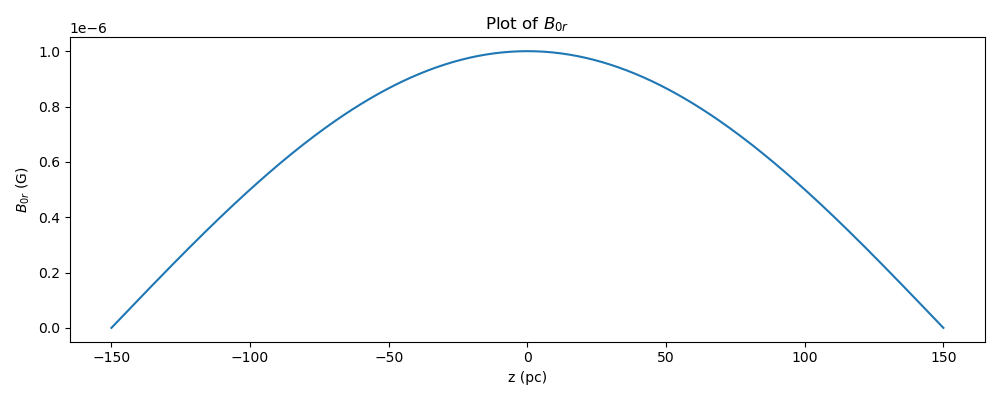

In [29]:
fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(10, 4))

# Plot of B0_R
axs.plot(z_val, B0_R)
axs.set_xlabel('z (pc)')
axs.set_ylabel(r'$B_{0r}$ (G)')
axs.set_title(r'Plot of $B_{0r}$')


plt.tight_layout()
plt.show()

Plotting variation of $B_{r}$ with time

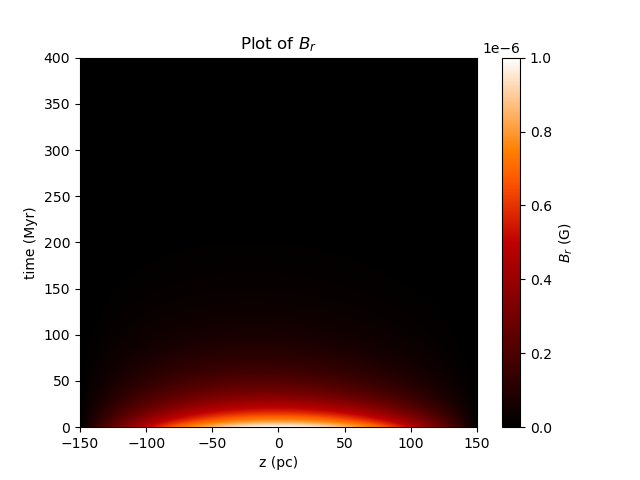

In [30]:
B_R,B_PHI = mod_crank_nicolson(z_val,B0_R, dt, t_f,eta,alpha,Omega,q,)
fig1=plt.figure()
plt.imshow(B_R, cmap='gist_heat', origin='lower', aspect='auto',extent=[z_min, z_max, 0, t_f])
plt.colorbar(label=r'$B_{r}$ (G)')
plt.xlabel('z (pc)')
plt.ylabel('time (Myr)')
plt.title(r'Plot of $B_{r}$')
plt.show()

In [31]:
create_ani(B_R[:][:,1:-1][::1],z_val[1:-1],t_val[::10],'B_r3.gif',['z (pc)',r'$B_r$ (G)'])

![B_r animation](B_r3.gif?dummy=192113)

Plotting variation of $B_{\phi}$ with time

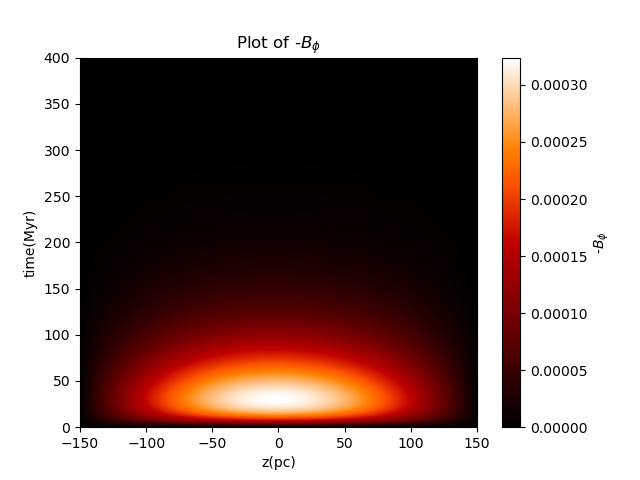

In [32]:
fig1=plt.figure()
plt.imshow(-B_PHI, cmap='gist_heat', origin='lower', aspect='auto',extent=[z_min, z_max, 0, t_f])
plt.colorbar(label=r'-$B_{\phi}$')
plt.xlabel('z(pc)')
plt.ylabel('time(Myr)')
plt.title(r'Plot of -$B_{\phi}$')
plt.show()

In [33]:
create_ani(B_PHI[:][:,1:-1][::1],z_val[1:-1],t_val[::5],'B_phi3.gif',['z (pc)',r'$B_{phi}$ (G)'])

![B_phi animation](B_phi3.gif?dummy=11313)

Calculating the decay rate $\gamma$ and $B_{total}$

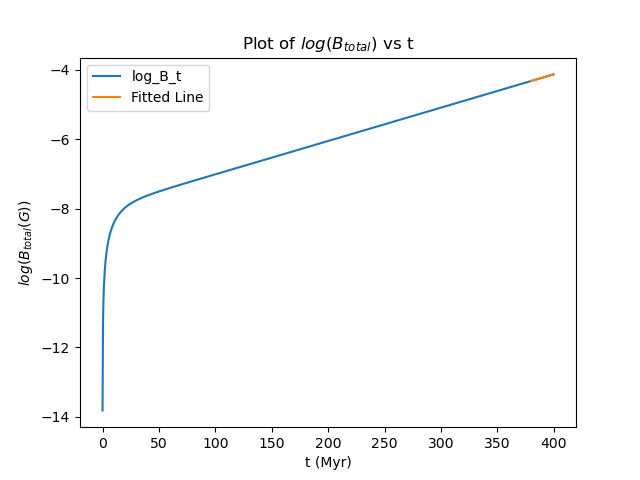

Decay factor gamma for B  -0.009614846443750278


In [53]:
B_total,p_b=b_total_pitch(B_R,B_PHI)
gamma=decay_factor(B_total[:,int(B_total.shape[1]/2)],t_val)
# plt.plot(t_val, np.log(B_total[:,50]), label='log_B_t')
plt.legend()

# Show the plot
# plt.show()
print("Decay factor gamma for B ",-gamma)

Ploting variation of $B_{total}$ with time

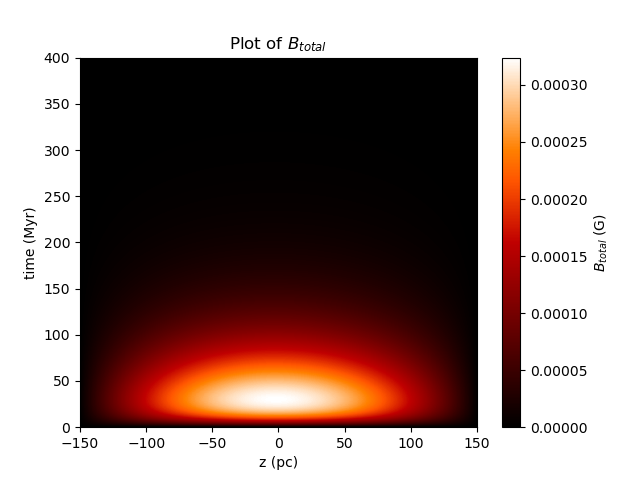

In [35]:
fig1=plt.figure()
plt.imshow(B_total, cmap='gist_heat', origin='lower', aspect='auto',extent=[z_min, z_max, 0, t_f])
plt.colorbar(label=r'$B_{total}$ (G)')
plt.xlabel('z (pc)')
plt.ylabel('time (Myr)')
plt.title(r'Plot of $B_{total}$')
plt.show()

In [36]:
create_ani(B_total[::5],z_val,t_val[::5],'B_tot3.gif',['z (pc)',r'$B_{tot}$ (G)'])

![Variation in Total B with time](B_tot2.gif)

Plotting pitch angle $P_b$ versus time

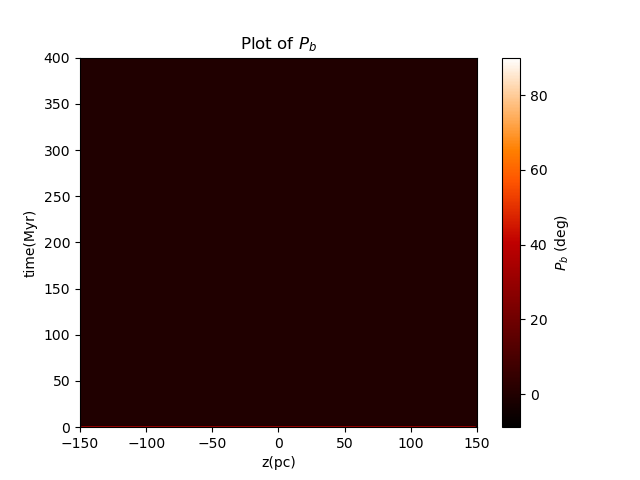

In [37]:
fig1=plt.figure()
plt.imshow(p_b, cmap='gist_heat', origin='lower', aspect='auto',extent=[z_min, z_max, 0, t_f])
plt.colorbar(label=r'$P_b$ (deg)')
plt.xlabel('z(pc)')
plt.ylabel('time(Myr)')
plt.title(r'Plot of $P_{b}$')
plt.show()

In [38]:
create_ani(p_b[:][:,1:-1][::7],z_val[1:-1],t_val[::7],'P_b3.gif',['z (pc)',r'$P_b$ (deg)'])

![Variation of Pitch angle with time](P_b3.gif?dummy=133)

### 2) $B_{0r}=10^{-6}\left\{sin\left(\pi\frac{z-z_{min}}{z_{max}}\right)\right\} G$
### $\:\:\:$    Dynamo number=9.66

Boundary conditions resolution and other parameters

In [39]:
#Spatial resolution and spatial domain
z_min = -150 #pc
z_max = 150 #pc
dz = 1 #pc
#Array of all spatial points
z_val = np.arange(z_min, z_max + dz, dz)
#Time resolution and time upto which integration is to be done
t_f=400 #Myr
dt=0.4 #Myr

t_val = np.arange(0, t_f, dt)
#Initial condition
B0_R=(1e-6)*np.sin((np.pi*(z_val-z_min)/(2*z_max)))
B0_R[-1]=0
#Diffusion parameter
eta=1e26*((3.24078e-19)**2)/(3.1710e-14)#1e26 cm^2/s converted to pc^2/Myr
alpha_0= 0.01*1.023#1km/s converted to pc/Myr
alpha =alpha_0*np.sin(np.pi*(z_val-z_min)/(2*z_max)/2)    
Omega = 30*1.023   #30km/s converted to pc/Myr
q = 1
print(f'Eta:{eta} , Omega:{Omega}')
print(f'Dynamo number:{alpha_0*Omega*(150**3)/eta**2}')

Eta:331.2095556102176 , Omega:30.689999999999998
Dynamo number:9.659187208249902


Plotting seed magnetic field

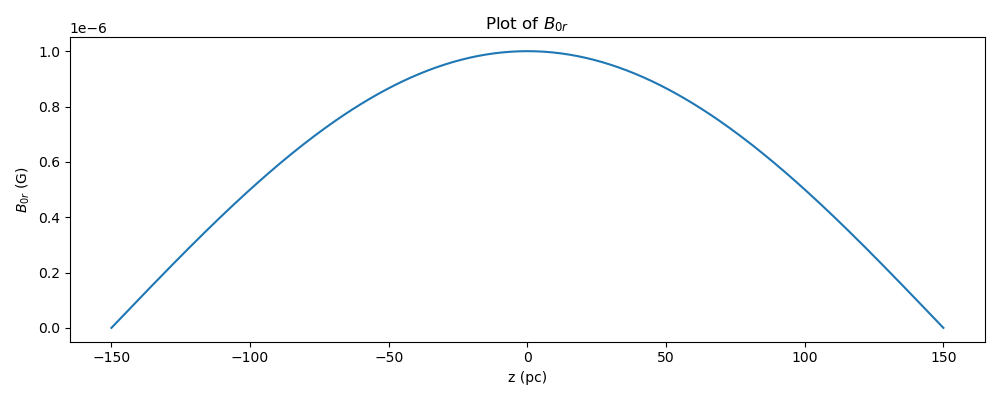

In [40]:
fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(10, 4))

# Plot of B0_R
axs.plot(z_val, B0_R)
axs.set_xlabel('z (pc)')
axs.set_ylabel(r'$B_{0r}$ (G)')
axs.set_title(r'Plot of $B_{0r}$')


plt.tight_layout()
plt.show()

Plotting variation of $B_{r}$ with time

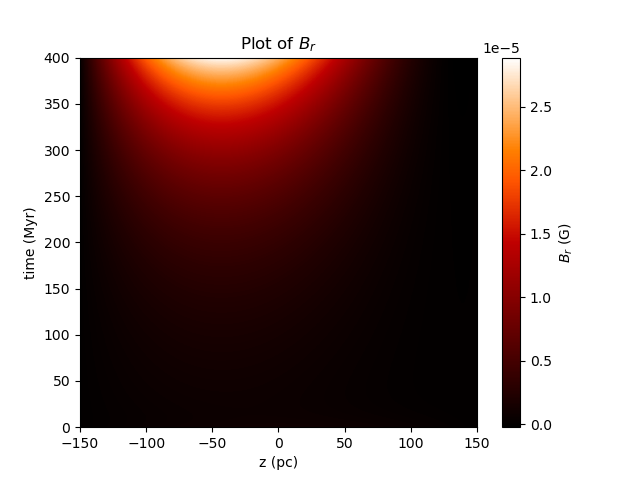

In [41]:
B_R,B_PHI = mod_crank_nicolson(z_val,B0_R, dt, t_f,eta,alpha,Omega,q,)
fig1=plt.figure()
plt.imshow(B_R, cmap='gist_heat', origin='lower', aspect='auto',extent=[z_min, z_max, 0, t_f])
plt.colorbar(label=r'$B_{r}$ (G)')
plt.xlabel('z (pc)')
plt.ylabel('time (Myr)')
plt.title(r'Plot of $B_{r}$')
plt.show()

In [42]:
create_ani(B_R[:][:,1:-1][::1],z_val[1:-1],t_val[::10],'B_r4.gif',['z (pc)',r'$B_r$ (G)'])

![B_r animation](B_r4.gif?dummy=192117)

Plotting variation of $B_{\phi}$ with time

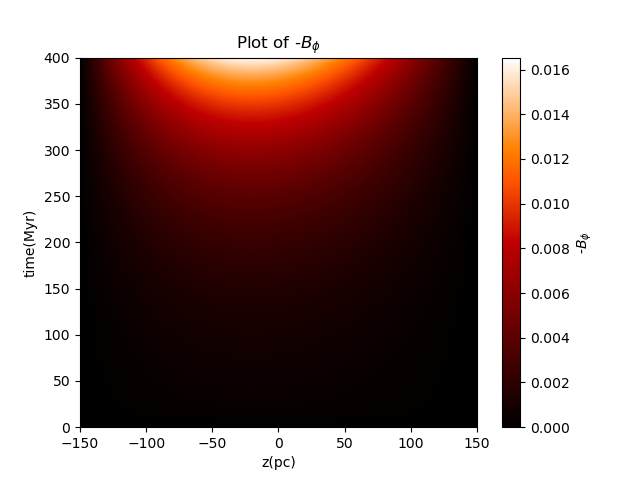

In [43]:
fig1=plt.figure()
plt.imshow(-B_PHI, cmap='gist_heat', origin='lower', aspect='auto',extent=[z_min, z_max, 0, t_f])
plt.colorbar(label=r'-$B_{\phi}$')
plt.xlabel('z(pc)')
plt.ylabel('time(Myr)')
plt.title(r'Plot of -$B_{\phi}$')
plt.show()

In [44]:
create_ani(B_PHI[:][:,1:-1][::1],z_val[1:-1],t_val[::5],'B_phi4.gif',['z (pc)',r'$B_{phi}$ (G)'])

![B_phi animation](B_phi3.gif?dummy=1135313)

Calculating the decay rate $\gamma$ and $B_{total}$

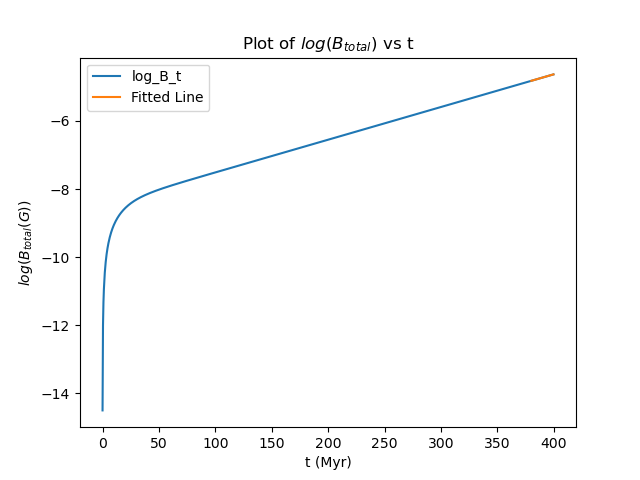

Decay factor gamma for B  -0.009614846443751936


In [45]:
B_total,p_b=b_total_pitch(B_R,B_PHI)
gamma=decay_factor(B_total[:,50],t_val)
# plt.plot(t_val, np.log(B_total[:,50]), label='log_B_t')
plt.legend()

# Show the plot
# plt.show()
print("Decay factor gamma for B ",-gamma)

Ploting variation of $B_{total}$ with time

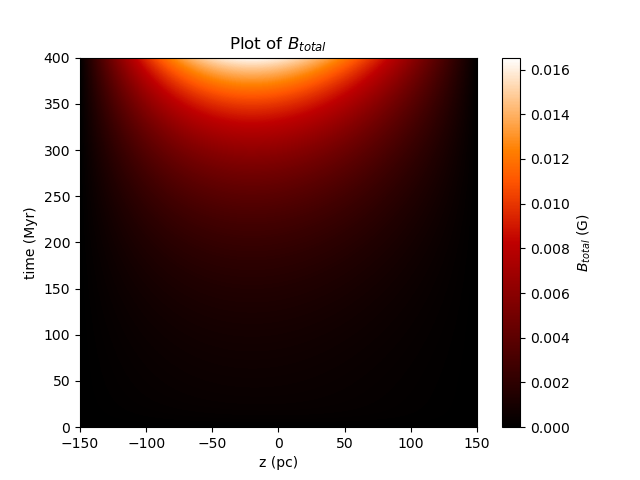

In [46]:
fig1=plt.figure()
plt.imshow(B_total, cmap='gist_heat', origin='lower', aspect='auto',extent=[z_min, z_max, 0, t_f])
plt.colorbar(label=r'$B_{total}$ (G)')
plt.xlabel('z (pc)')
plt.ylabel('time (Myr)')
plt.title(r'Plot of $B_{total}$')
plt.show()

In [47]:
create_ani(B_total[::5],z_val,t_val[::5],'B_tot4.gif',['z (pc)',r'$B_{tot}$ (G)'])

![Variation in Total B with time](B_tot2.gif)

Plotting pitch angle $P_b$ versus time

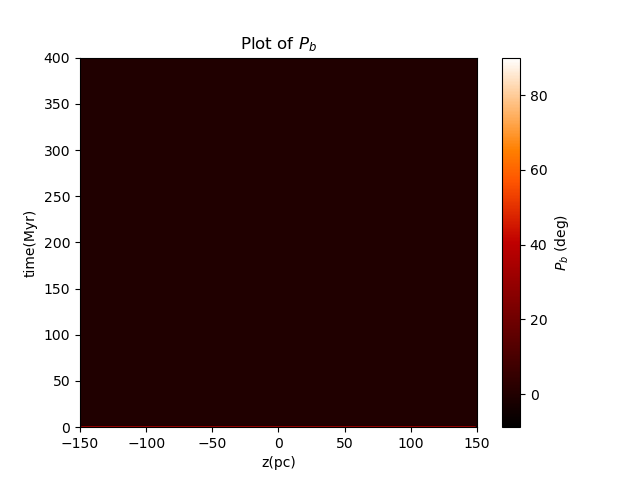

In [48]:
fig1=plt.figure()
plt.imshow(p_b, cmap='gist_heat', origin='lower', aspect='auto',extent=[z_min, z_max, 0, t_f])
plt.colorbar(label=r'$P_b$ (deg)')
plt.xlabel('z(pc)')
plt.ylabel('time(Myr)')
plt.title(r'Plot of $P_{b}$')
plt.show()

In [49]:
create_ani(p_b[:][:,1:-1][::7],z_val[1:-1],t_val[::7],'P_b4.gif',['z (pc)',r'$P_b$ (deg)'])

![Variation of Pitch angle with time](P_b4.gif?dummy=113531373)

Calculating critical dynamo number

In [71]:

tol = 1e-4
print('Calculating critical Dynamo number...')
D_c, x_arr, y_arr = bisection(c_dynamo, 0.001, 0.05, tol)
print('Critical Dynamo number Dc = ', np.round(D_c, 4))
print('Value of eta_T at D_c =', np.round(np.sqrt(-alpha_0*q*Omega*h**3/D_c), 4), '(100pc)^2/Myr')

plt.figure(figsize=(6, 4))
plt.plot(x_arr, y_arr)
plt.plot(x_arr, y_arr, 'ro')
plt.xlabel('Number of iterations')
plt.ylabel('Dynamo number')
plt.title('Convergence plot for Critical Dynamo number')
plt.grid()

plt.show()

Calculating critical Dynamo number...
0.0255 0.033252
0.01325 0.015467
0.007125 0.002441
0.004062 -0.006645
0.005594 -0.001757
0.006359 0.000412
0.005977 -0.000653
0.006168 -0.000116
0.006264 0.000149
